# Random forest

### trying the dessiontree first

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.tree import export_graphviz

In [45]:
df=pd.read_csv('car_evaluation.csv')
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot',  'safety','class']
df.columns = col_names
df.head()
#


,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


### preproccing

In [66]:
# df.drop(['maint','buying'],axis=1,inplace=True)
#cheek for null values
# df.isnull().sum()
# for col in df.columns:
#     print(df[col].value_counts())   
  
print(df['class'].value_counts())    

class
2    1209
0     384
1      69
3      65
Name: count, dtype: int64


In [46]:
lE = LabelEncoder()
df['lug_boot']=lE.fit_transform(df['lug_boot'])
df['safety']=lE.fit_transform(df['safety'])
df['class']=lE.fit_transform(df['class'])
df['buying']=lE.fit_transform(df['buying'])
df['maint']=lE.fit_transform(df['maint'])
# removeing (more) from doors and persons and converting them to int
df['doors'] = df['doors'].apply(lambda x: x.replace('5more', '5'))
df['persons'] = df['persons'].apply(lambda x: x.replace('more', '5'))
df['doors'] = df['doors'].astype(int)
df['persons'] = df['persons'].astype(int)
df[300:320]

,buying,maint,doors,persons,lug_boot,safety,class
300,3,2,5,2,1,2,2
301,3,2,5,2,1,0,2
302,3,2,5,2,0,1,2
303,3,2,5,2,0,2,2
304,3,2,5,2,0,0,2
305,3,2,5,4,2,1,2
306,3,2,5,4,2,2,2
307,3,2,5,4,2,0,0
308,3,2,5,4,1,1,2
309,3,2,5,4,1,2,0


### model

In [70]:
model=DecisionTreeClassifier()
X=df.drop('class',axis=1)
y=df['class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

#cross validation
print(cross_val_score(model,X,y,cv=5).mean())


0.9624277456647399
[[ 66   1   4   0]
 [  0  13   1   0]
 [  4   2 241   0]
 [  1   0   0  13]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93        71
           1       0.81      0.93      0.87        14
           2       0.98      0.98      0.98       247
           3       1.00      0.93      0.96        14

    accuracy                           0.96       346
   macro avg       0.93      0.94      0.93       346
weighted avg       0.96      0.96      0.96       346

0.7951227276535142


### random forest

In [72]:
df2=df.copy()
randomF=RandomForestClassifier()
X=df2.drop('class',axis=1)
y=df2['class']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print(x_train.shape)
print(x_test.shape)
print(x_train.dtypes)
randomF.fit(x_train,y_train)
y_pred=randomF.predict(x_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


(1381, 6)
(346, 6)
buying      int32
maint       int32
doors       int32
persons     int32
lug_boot    int32
safety      int32
dtype: object
0.9797687861271677
[[ 78   0   2   0]
 [  0  10   0   0]
 [  5   0 242   0]
 [  0   0   0   9]]
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        80
           1       1.00      1.00      1.00        10
           2       0.99      0.98      0.99       247
           3       1.00      1.00      1.00         9

    accuracy                           0.98       346
   macro avg       0.98      0.99      0.99       346
weighted avg       0.98      0.98      0.98       346



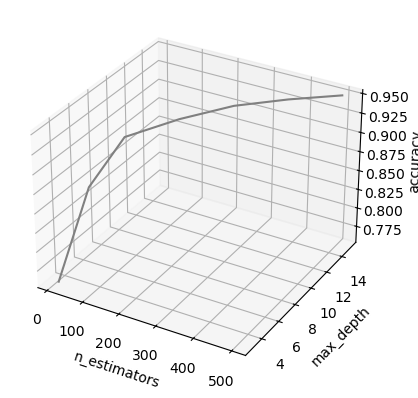

In [93]:
import category_encoders as ce
df3=pd.read_csv('car_evaluation.csv')
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot',  'safety','class']
df3.columns = col_names
x=df3.drop('class',axis=1)
y=df3['class']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)
# print(x_train)
# print(x_test.shape)
# print(df3.dtypes)
encoder1=ce.OrdinalEncoder(cols=['buying', 'maint', 'doors', 'persons', 'lug_boot',  'safety'])
x_train=encoder1.fit_transform(x_train)  
x_test=encoder1.transform(x_test)
hyerprameter=[[10,50,100,200,300,400,500],[3,5,7,9,11,13,15]]
scores=[]
for i in range(len(hyerprameter[0])):
    randomF=RandomForestClassifier(n_estimators=hyerprameter[0][i],max_depth=hyerprameter[1][i])
    randomF.fit(x_train,y_train)
    y_pred=randomF.predict(x_test)
    scores.append(accuracy_score(y_test,y_pred))
#plot 3d graph for hyperprameter and scores
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot3D(hyerprameter[0], hyerprameter[1], scores, 'gray')
ax.set_xlabel('n_estimators')
ax.set_ylabel('max_depth')
ax.set_zlabel('accuracy')
plt.show()


# rf=RandomForestClassifier(random_state=0,n_estimators=100,max_depth=5)
# rf.fit(x_train,y_train)
# y_pred=rf.predict(x_test)
# print(accuracy_score(y_test,y_pred))
# print(classification_report(y_test,y_pred))

